**Atualizando a biblioteca para plotagem de gráficos**


In [285]:
!pip -q install plotly --upgrade

**Para balanceamento de classes, veja os métodos em:**

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html 

**Importando bibliotecas**

In [286]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Abrindo um arquivo CSV do drive**

In [287]:
base = pd.read_csv('/content/sample_data/cancer.csv', ';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [288]:
base

,age,menopause,tumorsize,invnodes,nodecaps,degmalig,breast,breastquad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,03/mai,yes,2,left,right_up,no,recurrence-events
...,...,...,...,...,...,...,...,...,...,...
281,50-59,ge40,30-34,06/ago,yes,2,left,left_low,no,no-recurrence-events
282,50-59,premeno,25-29,03/mai,yes,2,left,left_low,yes,no-recurrence-events
283,30-39,premeno,30-34,06/ago,yes,2,right,right_up,no,no-recurrence-events
284,50-59,premeno,15-19,0-2,no,2,right,left_low,no,no-recurrence-events


**Verificando se tem ausência de dados**

In [289]:
base.isnull()

,age,menopause,tumorsize,invnodes,nodecaps,degmalig,breast,breastquad,irradiat,Class
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
281,False,False,False,False,False,False,False,False,False,False
282,False,False,False,False,False,False,False,False,False,False
283,False,False,False,False,False,False,False,False,False,False
284,False,False,False,False,False,False,False,False,False,False


In [290]:
base.isnull().sum()

age           0
menopause     0
tumorsize     0
invnodes      0
nodecaps      0
degmalig      0
breast        0
breastquad    0
irradiat      0
Class         0
dtype: int64

**Verificando uma instância antes da imputação**.

**Veja que ele não tem o tipo NAN e sim a interrogação**

In [291]:
X_comNAN = base.iloc[20, 0:10]

In [292]:
X_comNAN 

age                       50-59
menopause                  lt40
tumorsize                 20-24
invnodes                    0-2
nodecaps                      ?
degmalig                      1
breast                     left
breastquad             left_low
irradiat                     no
Class         recurrence-events
Name: 20, dtype: object

**Podemos substituir todas as interrogações por 'NAN'**

In [293]:
base.replace('?', np.nan, inplace = True)

In [294]:
X_comNAN = base.iloc[20, 0:10]

In [295]:
X_comNAN 

age                       50-59
menopause                  lt40
tumorsize                 20-24
invnodes                    0-2
nodecaps                    NaN
degmalig                      1
breast                     left
breastquad             left_low
irradiat                     no
Class         recurrence-events
Name: 20, dtype: object

**Vamos contar tudo novamente?**

In [296]:
base.isnull().sum()

age           0
menopause     0
tumorsize     0
invnodes      0
nodecaps      8
degmalig      0
breast        0
breastquad    1
irradiat      0
Class         0
dtype: int64


**Podemos eliminar todas as instâncias que possuem dados ausentes**

In [297]:
#base = base.dropna()
#base.isnull().sum()

**Ou utilizar métodos de imputação...**

**Vamos imputá-los pela MODA**

In [298]:
base['nodecaps'].fillna(base['nodecaps'].mode()[0], inplace=True)

In [299]:
base['breastquad'].fillna(base['breastquad'].mode()[0], inplace=True)

In [300]:
base.isnull().sum()

age           0
menopause     0
tumorsize     0
invnodes      0
nodecaps      0
degmalig      0
breast        0
breastquad    0
irradiat      0
Class         0
dtype: int64

**Verificando a instância depois da imputação**

In [301]:
X_imputado = base.iloc[20, 0:10]

In [302]:
X_imputado

age                       50-59
menopause                  lt40
tumorsize                 20-24
invnodes                    0-2
nodecaps                     no
degmalig                      1
breast                     left
breastquad             left_low
irradiat                     no
Class         recurrence-events
Name: 20, dtype: object

**Você também pode fazer o mesmo usando os comandos abaixo:**

In [303]:
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy='most_frequent') 
#imputer.fit(base)
#base = pd.DataFrame(imputer.fit_transform(base),columns = base.columns)

**Contando e visualizando a quantidade de opções que temos em cada atributo**

In [304]:
len(np.unique(base['age'])), len(np.unique(base['menopause'])), len(np.unique(base['tumorsize'])), len(np.unique(base['invnodes'])), len(np.unique(base['breastquad']))

(6, 3, 11, 7, 5)

((array(['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'], dtype=object),
  array([ 1, 36, 90, 96, 57,  6])),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7115da8250>)

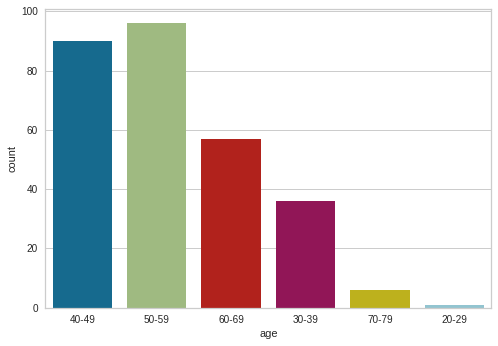

In [305]:
np.unique(base['age'], return_counts=True), sns.countplot(x = base['age'])

((array(['ge40', 'lt40', 'premeno'], dtype=object), array([129,   7, 150])),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7115c52290>)

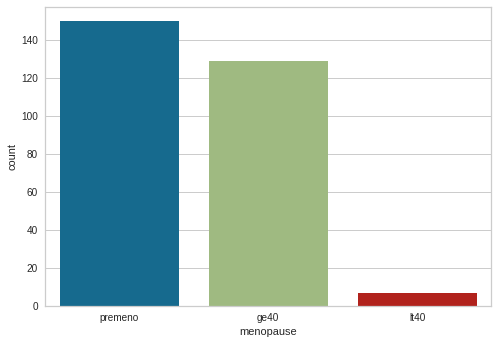

In [306]:
np.unique(base['menopause'], return_counts=True), sns.countplot(x = base['menopause'])

((array(['0-4', '05/set', '15-19', '20-24', '25-29', '30-34', '35-39',
         '40-44', '45-49', '50-54', 'out/14'], dtype=object),
  array([ 8,  4, 30, 50, 54, 60, 19, 22,  3,  8, 28])),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f711587c7d0>)

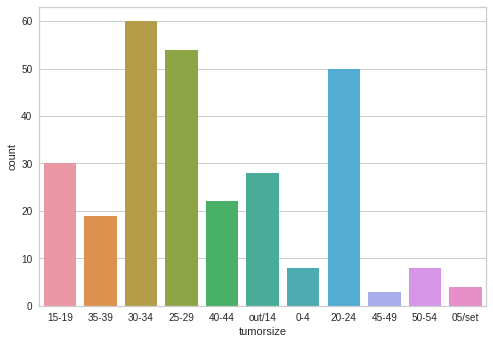

In [307]:
np.unique(base['tumorsize'], return_counts=True), sns.countplot(x = base['tumorsize'])

((array(['0-2', '03/mai', '06/ago', '09/nov', '15-17', '24-26', 'dez/14'],
        dtype=object), array([213,  36,  17,  10,   6,   1,   3])),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f711591f350>)

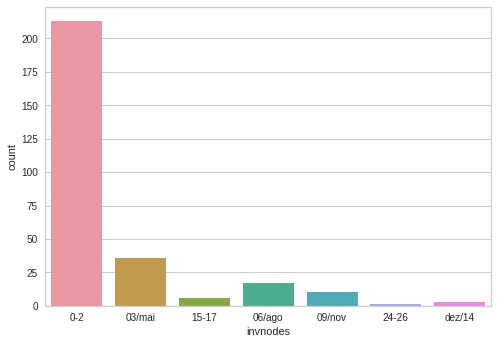

In [308]:
base.replace('05/set', '5-9', inplace = True)
base.replace('out/14', '10-14', inplace = True)
np.unique(base['invnodes'], return_counts=True), sns.countplot(x = base['invnodes'])

((array(['0-4', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
         '40-44', '45-49', '5-9', '50-54'], dtype=object),
  array([ 8, 28, 30, 50, 54, 60, 19, 22,  3,  4,  8])),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f711573f950>)

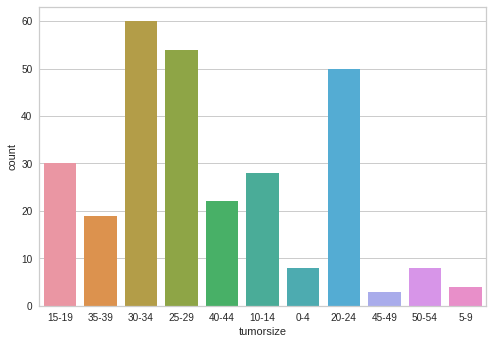

In [309]:
np.unique(base['tumorsize'], return_counts=True), sns.countplot(x = base['tumorsize'])

((array(['0-2', '12-14', '15-17', '24-26', '3-5', '6-8', '9-11'],
        dtype=object), array([213,   3,   6,   1,  36,  17,  10])),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7115670750>)

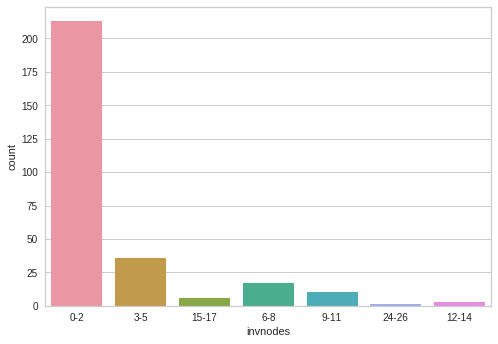

In [310]:
base.replace('03/mai', '3-5', inplace = True)
base.replace('06/ago', '6-8', inplace = True)
base.replace('09/nov', '9-11', inplace = True)
base.replace('dez/14', '12-14', inplace = True)
np.unique(base['invnodes'], return_counts=True), sns.countplot(x = base['invnodes'])

((array(['no', 'yes'], dtype=object), array([230,  56])),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f71155ed410>)

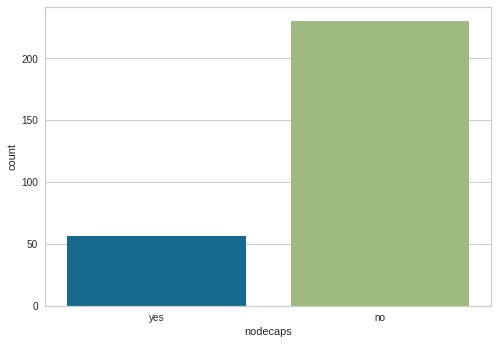

In [311]:
np.unique(base['nodecaps'], return_counts=True), sns.countplot(x = base['nodecaps'])

((array([1, 2, 3]), array([ 71, 130,  85])),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f71155c1790>)

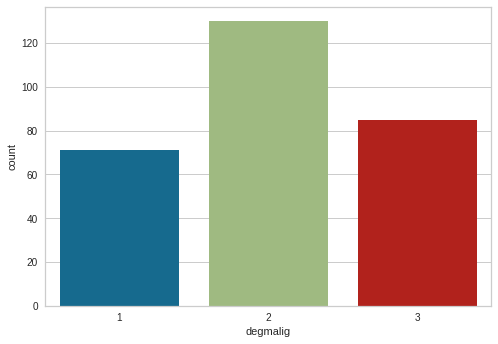

In [312]:
np.unique(base['degmalig'], return_counts=True), sns.countplot(x = base['degmalig'])

((array(['left', 'right'], dtype=object), array([152, 134])),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f711552db90>)

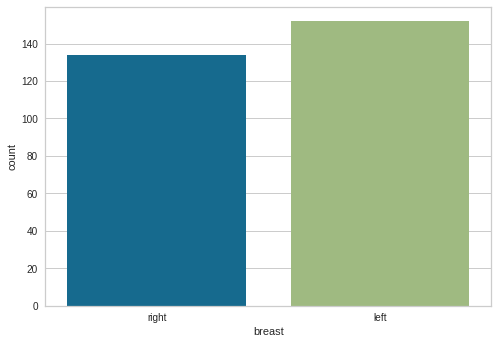

In [313]:
np.unique(base['breast'], return_counts=True), sns.countplot(x = base['breast'])

((array(['central', 'left_low', 'left_up', 'right_low', 'right_up'],
        dtype=object), array([ 21, 111,  97,  24,  33])),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7115511250>)

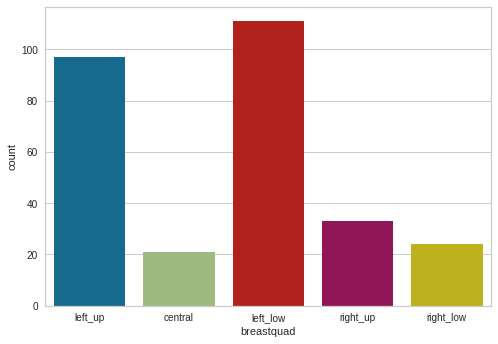

In [314]:
np.unique(base['breastquad'], return_counts=True), sns.countplot(x = base['breastquad'])

((array(['no', 'yes'], dtype=object), array([218,  68])),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f711547e090>)

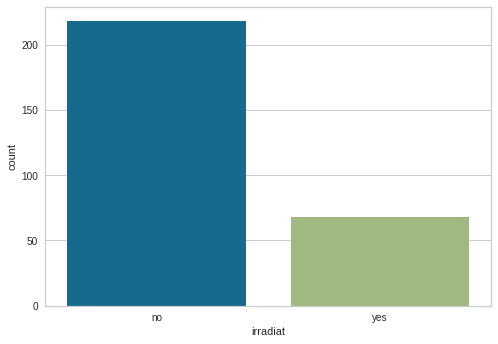

In [315]:
np.unique(base['irradiat'], return_counts=True), sns.countplot(x = base['irradiat'])

**Contando quantidade de instâncias**


In [316]:
np.unique(base['Class'], return_counts=True)

(array(['no-recurrence-events', 'recurrence-events'], dtype=object),
 array([201,  85]))

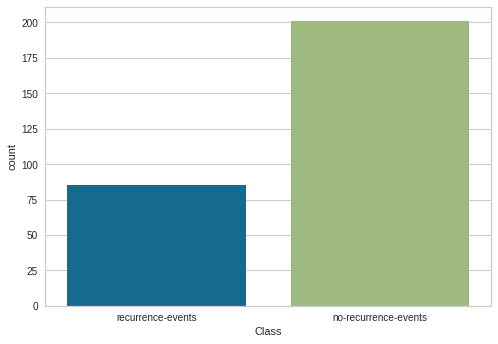

In [317]:
sns.countplot(x = base['Class']);

**Separando os atributos de entrada e de classe**

In [318]:
X_prev = base.iloc[:, 0:9].values

In [319]:
X_prev

array([['40-49', 'premeno', '15-19', ..., 'right', 'left_up', 'no'],
       ['50-59', 'ge40', '15-19', ..., 'right', 'central', 'no'],
       ['50-59', 'ge40', '35-39', ..., 'left', 'left_low', 'no'],
       ...,
       ['30-39', 'premeno', '30-34', ..., 'right', 'right_up', 'no'],
       ['50-59', 'premeno', '15-19', ..., 'right', 'left_low', 'no'],
       ['50-59', 'ge40', '40-44', ..., 'left', 'right_up', 'no']],
      dtype=object)

In [320]:
y_classe = base.iloc[:, 9].values

In [321]:
y_classe

array(['recurrence-events', 'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrenc

In [322]:
y_classe.shape

(286,)

In [323]:
X_prev.shape

(286, 9)

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [324]:
from sklearn.preprocessing import LabelEncoder

In [325]:
label_encoder = LabelEncoder()

In [326]:
X_prev[:,4]

array(['yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes',
       'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no',
       'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 

In [327]:
X_prev

array([['40-49', 'premeno', '15-19', ..., 'right', 'left_up', 'no'],
       ['50-59', 'ge40', '15-19', ..., 'right', 'central', 'no'],
       ['50-59', 'ge40', '35-39', ..., 'left', 'left_low', 'no'],
       ...,
       ['30-39', 'premeno', '30-34', ..., 'right', 'right_up', 'no'],
       ['50-59', 'premeno', '15-19', ..., 'right', 'left_low', 'no'],
       ['50-59', 'ge40', '40-44', ..., 'left', 'right_up', 'no']],
      dtype=object)

In [328]:
label_encoder_nodecaps = LabelEncoder()
label_encoder_breast = LabelEncoder()
label_encoder_irradiat = LabelEncoder()

In [329]:
X_prev[:,0] = label_encoder_nodecaps.fit_transform(X_prev[:,0])
X_prev[:,1] = label_encoder_nodecaps.fit_transform(X_prev[:,1])
X_prev[:,2] = label_encoder_nodecaps.fit_transform(X_prev[:,2])
X_prev[:,3] = label_encoder_nodecaps.fit_transform(X_prev[:,3])
X_prev[:,4] = label_encoder_nodecaps.fit_transform(X_prev[:,4])
X_prev[:,6] = label_encoder_breast.fit_transform(X_prev[:,6])
X_prev[:,8] = label_encoder_irradiat.fit_transform(X_prev[:,8])

In [330]:
X_prev

array([[2, 2, 2, ..., 1, 'left_up', 0],
       [3, 0, 2, ..., 1, 'central', 0],
       [3, 0, 6, ..., 0, 'left_low', 0],
       ...,
       [1, 2, 5, ..., 1, 'right_up', 0],
       [3, 2, 2, ..., 1, 'left_low', 0],
       [3, 0, 7, ..., 0, 'right_up', 0]], dtype=object)



>** OneHotEncoder - Agora vamos binarizar atributos não ordinais**

In [331]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [332]:
X_prev

array([[2, 2, 2, ..., 1, 'left_up', 0],
       [3, 0, 2, ..., 1, 'central', 0],
       [3, 0, 6, ..., 0, 'left_low', 0],
       ...,
       [1, 2, 5, ..., 1, 'right_up', 0],
       [3, 2, 2, ..., 1, 'left_low', 0],
       [3, 0, 7, ..., 0, 'right_up', 0]], dtype=object)

In [333]:
onehotencoder_base = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [7])], remainder='passthrough')

In [334]:
X_prev= onehotencoder_base.fit_transform(X_prev)

In [335]:
X_prev

array([[0.0, 0.0, 1.0, ..., 3, 1, 0],
       [1.0, 0.0, 0.0, ..., 1, 1, 0],
       [0.0, 1.0, 0.0, ..., 2, 0, 0],
       ...,
       [0.0, 0.0, 0.0, ..., 2, 1, 0],
       [0.0, 1.0, 0.0, ..., 2, 1, 0],
       [0.0, 0.0, 0.0, ..., 3, 0, 0]], dtype=object)

In [336]:
X_prev.shape

(286, 13)

**Método de amostragem Holdout**

In [337]:
from sklearn.model_selection import train_test_split

In [338]:
y_classe.shape

(286,)

In [339]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 0)

In [340]:
X_treino.shape

(228, 13)

In [341]:
X_teste.shape

(58, 13)

**Vamos treinar o modelo com as classes desbalanceadas?**

In [342]:
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=100, max_features=6, criterion='gini', random_state = 0)
modelo.fit(X_treino, y_treino)

RandomForestClassifier(max_features=6, random_state=0)

In [343]:
previsoes = modelo.predict(X_teste)

In [344]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.6896551724137931

In [345]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[32,  4],
       [14,  8]])

0.6896551724137931

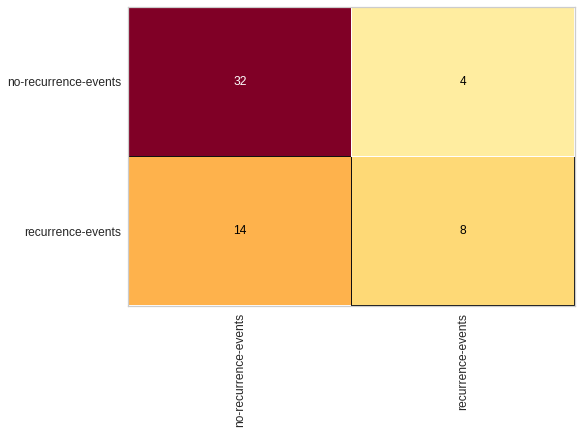

In [346]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [347]:
print(classification_report(y_teste, previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.70      0.89      0.78        36
   recurrence-events       0.67      0.36      0.47        22

            accuracy                           0.69        58
           macro avg       0.68      0.63      0.63        58
        weighted avg       0.68      0.69      0.66        58



**Vamos balancear os dados usando um método undersampling?**

In [348]:
from imblearn.under_sampling import TomekLinks

In [349]:
balanceamento_under = TomekLinks(sampling_strategy='auto')
X_under, y_under = balanceamento_under.fit_resample(X_treino, y_treino)

In [350]:
X_under.shape, y_under.shape

((213, 13), (213,))

**Quantas instâncias tinha em cada classe originalmente?**

In [351]:
np.unique(y_treino, return_counts=True)

(array(['no-recurrence-events', 'recurrence-events'], dtype=object),
 array([165,  63]))

**Quantas instâncias tem agora após o balanceamento?**

In [352]:
np.unique(y_under, return_counts=True)

(array(['no-recurrence-events', 'recurrence-events'], dtype=object),
 array([150,  63]))

**Vamos ver se o balanceamento melhorou a qualidade do modelo?**

In [353]:
modelo2 = RandomForestClassifier(n_estimators=100, max_features=6, criterion='gini', random_state = 0)
modelo2.fit(X_under, y_under)

RandomForestClassifier(max_features=6, random_state=0)

In [354]:
previsoes = modelo2.predict(X_teste)

In [355]:
accuracy_score(y_teste,previsoes)

0.7241379310344828

0.7241379310344828

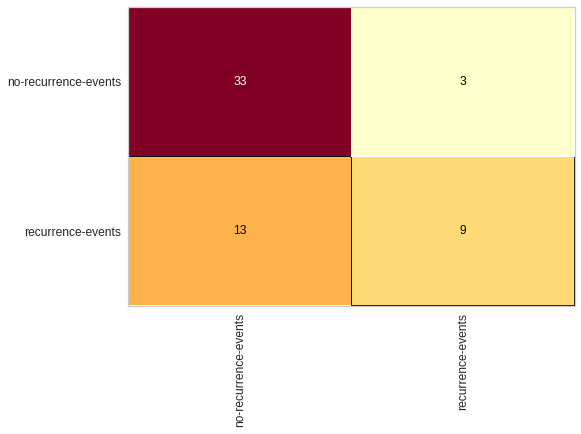

In [356]:
cm = ConfusionMatrix(modelo2)
cm.fit(X_under, y_under)
cm.score(X_teste, y_teste)

In [357]:
print(classification_report(y_teste, previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.72      0.92      0.80        36
   recurrence-events       0.75      0.41      0.53        22

            accuracy                           0.72        58
           macro avg       0.73      0.66      0.67        58
        weighted avg       0.73      0.72      0.70        58

